### Cross validation and simple linear regression

We will predict employee salaries from different employee characteristics (or features). We are going to use a simple supervised learning technique: linear regression. We want to build a simple model to determine how well Years Worked predicts an employee’s salary.
#### Questions to be explored
* Is there a relationship between years worked and salary earned over time?
* How strong is that relationship?
* What is the effect of increse in years and the salary?
* What are other factors that affect change in salary?
* We will explore these questions below!

In [99]:
# importig required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats 
from scipy.stats import pearsonr
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr

In [100]:
df = pd.read_csv("salary .csv")
df.shape

(514, 11)

### 1. Cleaning of data

* there are 514 observations in the given dataset with 11 features

In [101]:
# checking for null values
df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

#### 2. Replacing null value with mean of salary

In [102]:
#Filling the missing values with the average

df_initial = df.fillna(df['salary'].mean())

df_initial.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

#### Removal of extreme values

In [103]:
# Removing 
#standard deviation above 2 
q75_train, q25_train = np.percentile(df_initial['salary'], [75 ,25])
iqr_train = q75_train - q25_train
lower_train_bound = q25_train - iqr_train*1.5
upper_train_bound = q75_train + iqr_train*1.5
lower_train_bound
upper_train_bound

90765.625

In [104]:
df['Is_it_an_extreme'] = ['Yes' if i < lower_train_bound else 'Yes' if i > upper_train_bound else "No" for i in df_initial.salary]
df_outliers = df[df.Is_it_an_extreme == 'Yes']
df_outliers


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Is_it_an_extreme
280,91405.0,0,23,14,1.18,1,0,3,1,1,0,Yes
377,96156.0,20,12,12,1.19,1,0,3,1,1,2,Yes


* Linear regression is based on mostly parametric statistics like means, standard deviation and in this case correlation between salary earned and years of experience accrued. 

* Outliers who alter parametric statistics significantly would in turn alter predictions to be made.

* The outliers in question do not change the results desired from the model but does affect assumptions made about the dependant variable(salary_earned)

* The gradient of the regression model and the mean would be affected significantly enough to give reason for dropiing the values predictions derived from it would be sightly altered as 



##### * The extreme values should be dropped

#### Two outliers where found in the data-frame and where dropped as they were

In [79]:
# drop value with index 377

drop = [df_initial[280]].drop
df_cleaned = df_initial.drop(377)
df_cleaned.shape

SyntaxError: invalid syntax (<ipython-input-79-d394c6ef45b0>, line 3)

In [80]:
# dropping extreme value at index 280
df_cleaned = df_cleaned.drop(280) 
df_cleaned.shape

KeyError: '[280] not found in axis'

In [81]:
df_cleaned.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.102471,0.632135,0.613411,0.397153,0.043012,0.173972,0.704892,0.362302,-0.493484,-0.066496
exprior,0.102471,1.000000,-0.248118,-0.071533,-0.045262,-0.051132,0.269539,0.112165,0.043824,-0.041153,0.135723
yearsworked,0.632135,-0.248118,1.000000,0.813662,-0.074319,0.028088,-0.040123,0.747183,0.278351,-0.259999,0.056364
yearsrank,0.613411,-0.071533,0.813662,1.000000,-0.032917,0.005836,0.007835,0.483265,0.236262,-0.260419,0.037028
market,0.397153,-0.045262,-0.074319,-0.032917,1.000000,0.035405,0.023147,-0.020056,0.178630,-0.217271,-0.165736
degree,0.043012,-0.051132,0.028088,0.005836,0.035405,1.000000,-0.214591,0.042989,0.061227,-0.097773,0.029584
otherqual,0.173972,0.269539,-0.040123,0.007835,0.023147,-0.214591,1.000000,0.161575,0.016332,-0.078059,-0.017945
position,0.704892,0.112165,0.747183,0.483265,-0.020056,0.042989,0.161575,1.000000,0.316646,-0.284845,0.031296
male,0.362302,0.043824,0.278351,0.236262,0.178630,0.061227,0.016332,0.316646,1.000000,-0.126357,-0.621940
Field,-0.493484,-0.041153,-0.259999,-0.260419,-0.217271,-0.097773,-0.078059,-0.284845,-0.126357,1.000000,-0.002017


In [82]:
x = df_cleaned.yearsworked
y = df_cleaned.salary

### 3. Splitting of Data

In [86]:
# splitting data to training set and test set
# 80/20 split
x_train,y_train,x_test,y_test = train_test_split(x,y, test_size= 0.3)
                                                                                           

### 5. Visialising the distribution of the dependant and indepedant variables



#### 5.1 A histogram showing the distribution of years worked

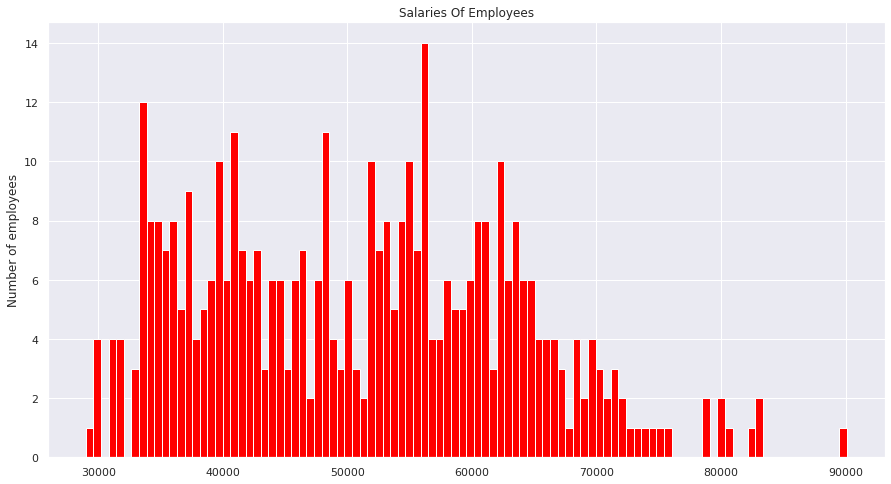

In [87]:
sns.set()
plt.figure(figsize=(15,8))
plt.hist(df_train['salary'], color='red', stacked=False, orientation='vertical', bins = 100)
plt.ylabel('Number of employees')
plt.title('Salaries Of Employees')
plt.show()

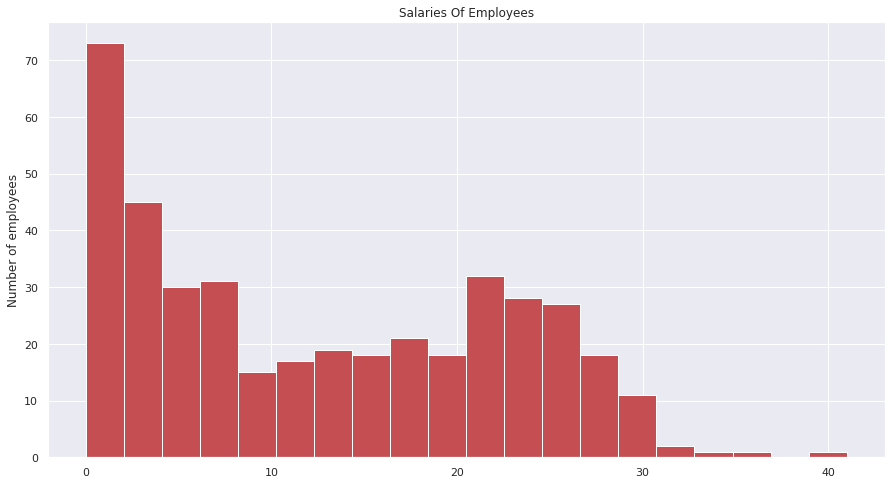

In [88]:
sns.set()
plt.figure(figsize=(15,8))
plt.hist(df_train['yearsworked'], color='r', stacked=False, orientation='vertical', bins= 20)
plt.xlabel(' ')
plt.ylabel('Number of employees')
plt.title('Salaries Of Employees')
plt.show()

In [89]:
# basic stats of the dependant variable 
salary_earned_train.describe()


,salary
count,408.000000
mean,50989.789296
std,12312.657553
min,29000.000000
25%,40473.000000
50%,51669.000000
75%,60480.515625
max,90082.000000


In [90]:
yrs_worked_train.describe()

,yearsworked
count,408.000000
mean,12.850490
std,9.607772
min,0.000000
25%,3.000000
50%,11.500000
75%,22.000000
max,41.000000


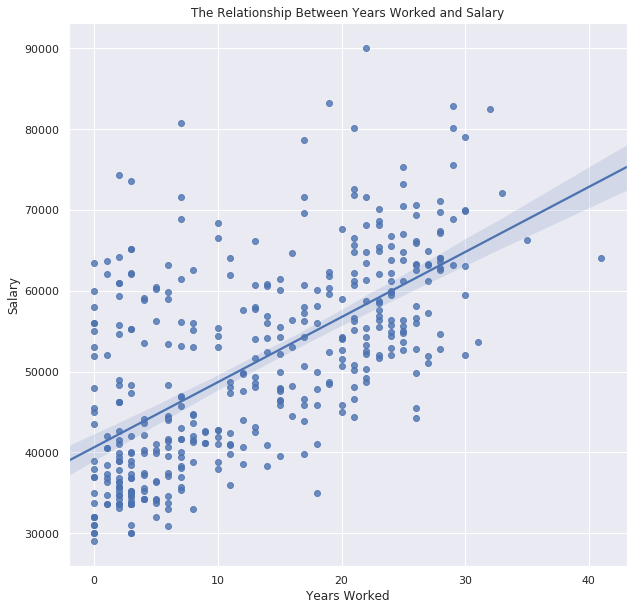

In [91]:
plt.figure(figsize=(10,10))
sns.regplot(x= df_train.yearsworked, y= df_train.salary, data=df)
plt.xlabel('Years Worked')
plt.ylabel('Salary')
plt.title('The Relationship Between Years Worked and Salary')
plt.show()

### Extreme points 

### Running a simple linear regression for salry

### Fitting Simple Linear Regression to the Training set


In [92]:

import statsmodels.formula.api as smf
# create a fitted model in one line
regressor = smf.ols(formula='salary ~ yearsworked', data=df_train).fit()
# print the coefficients
regressor.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     264.9
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           3.27e-46
Time:                        14:20:44   Log-Likelihood:                -4318.7
No. Observations:                 408   AIC:                             8641.
Df Residuals:                     406   BIC:                             8649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.064e+04    793.500     51.218      0.000    3.91e+04    4.22e+04
yearsworked   805.2811     49.476     16.276      0.000     708.020     902.543
==============================================================================
Omnibus:                       48.079   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.715
Skew:                           0.916   Prob(JB):                     3.97e-14
Kurtosis:                       3.522   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Adding 1 year to the time worked results in the increase of salary earned

### Dertemining weather the model significantly predicts the dependant variable

In [98]:
prediction = regressor.predict(12)

TypeError: object of type 'int' has no len()

In [93]:
# 
coeffs = pearsonr(df_train.yearsworked,df_train.salary)
coeffs

(0.6283743185999722, 3.2745172281509664e-46)



* The correlation coefficient suggest that the data follows a linear relationship and it is normally distributed. The correlation coefficient is closer to 1 than it is to 0 which shows a moderate positive relationship between the two variables.
* This means as years worked increase the salary increases in the same extent 
* The p_value is too small and indicates strong evidence against the null hypothesis that the relationship between the variables is statistically significant since it is smaller than the threshold of the P_value of 0.05.

### Percentage of the variance in employees’ salaries that is accounted for by the number of years they have worked

In [94]:
regressor.conf_int()

,0,1
Intercept,39081.650632,42201.413101
yearsworked,708.019693,902.542593


In [95]:
# predicting the expected salary for someone with 12years' work experience 
regressor.predict([1,12])

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: TypeError: list indices must be integers or slices, not str
    salary ~ yearsworked
             ^^^^^^^^^^^

In [ ]:
# predicting the expected salary for someone with 80 years work experience
regressor.predict([1,80])

In [ ]:
# #histogram
# sns.set()
# plt.figure(figsize=(15,10))
# plt.hist(yrs_worked_train, color= "r", stacked=False, orientation='vertical')
# plt.ylabel('Number of Employees ')
# plt.xlabel('Salary Earned')
# plt.title('Salary Earned for Train Set')
# plt.show()

In [ ]:
# creating a vector to predict the dependant variable Test set
# yrs_worked_predictor= regressor.predict(yrs_worked_test)
#